# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np

from seaborn import load_dataset

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

%matplotlib inline

In [22]:
# Carregando os dados e criando as variáveis
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

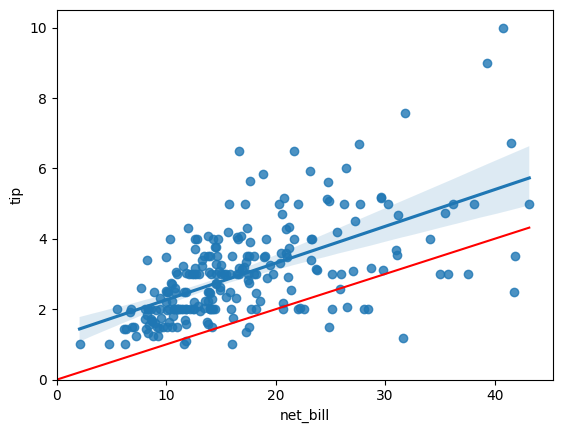

In [25]:
# Gráfico de dispersão
sns.regplot(
    data=tips[tips['tip_pct']<.5],
    # data=tips,
    x='net_bill',
    y='tip'
)

# # Gerando dados para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1*x

# # Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left=0)
plt.ylim(bottom=0)

In [29]:
reg_tip = smf.ols('tip ~ net_bill', data=tips).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           5.02e-23
Time:                        16:51:55   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [35]:
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.52e-06
Time:                        17:28:47   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.505398619388979)

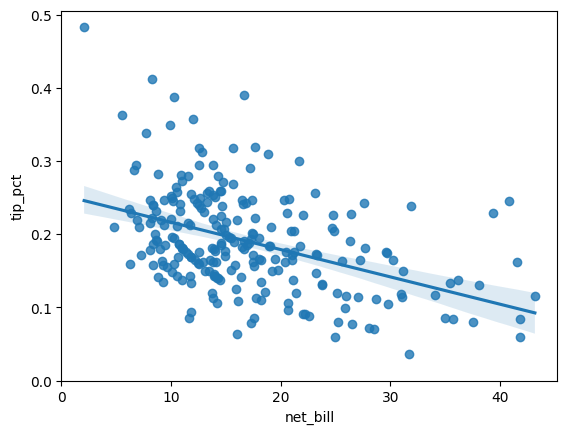

In [38]:
# Gráfico de dispersão
sns.regplot(
    data=tips[tips['tip_pct']<.5],
    x='net_bill',
    y='tip_pct'
)

# Gerando dados para a linha dos 10%
# x = np.linspace(0, tips['net_bill'].max(), 100)
# y = .1*x

# Plotando a linha dos 10%
# plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0, 0) no gráfico
plt.xlim(left=0)
plt.ylim(bottom=0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$ s?

In [50]:
print(f"R² de reg_tip é: {(reg_tip.rsquared*100):.2f}%")
print(f"R² de reg_tip_pct é: {(reg_tip_pct.rsquared*100):.2f}%")

R² de reg_tip é: 33.25%
R² de reg_tip_pct é: 9.13%


No primeiro gráfico temos uma dispersão positiva. Após o ajuste o segundo gráfico mostra uma dispersão negativa.<br />
1 - Quanto maior o valor líquido, maior a gorjeta<br />
2 - Quanto maior o valor líquido, menor a porcentagem da gorjeta<br />

Acredito não ser possível comparar diretamente os R²s.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

## Não entendi o enunciado.

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:

Qual item 3? O acima é uma pergunta, não tem modelo... o item 3 abaixo é para calcular o R², não tem modelo...

In [55]:
dir(reg_tip)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)

In [30]:
# The predicted values from the model at the estimated parameters.
reg_tip_pct.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```

## Não entendi o pedido...

In [52]:
reg_tip.fittedvalues

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [51]:
tips['tip_predict'] = tips['tip_pct'] * tips['net_bill']
tips['tip_predict']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip_predict, Length: 244, dtype: float64

3. calcule o $R^2$ do modelo para ```tip```

## Não entendi, é para ser do primeiro modelo reg_tip?

In [54]:
print(f"R² de reg_tip é: {(reg_tip.rsquared*100):.2f}%")

R² de reg_tip é: 33.25%


4. compare esse $R^2$ com o do item 1